## Decon using RedLionFish library

Works fine for small 3D arrays, but takes an extremely long time for large arrays

In [6]:
import RedLionfishDeconv as rl
from aicsimageio import AICSImage
from skimage.io import imread 
import numpy as np 

psf_1 = imread("../sample_data/psfs/zeiss_simulated/488.tif")
img = AICSImage("../sample_data/RBC_tiny.czi")


In [7]:
%%timeit -r 1 -n 1
img_norm = rl.doRLDeconvolutionFromNpArrays(data_np = np.squeeze(img.data), 
                                 psf_np = psf_1, 
                                 niter= 10, 
                                 method = "gpu")

35.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
img_norm = rl.doRLDeconvolutionFromNpArrays(data_np = np.squeeze(img.data), 
                                 psf_np = psf_1, 
                                 niter= 10, 
                                 method = "gpu")

In [11]:
img_norm.shape

(834, 118, 209)

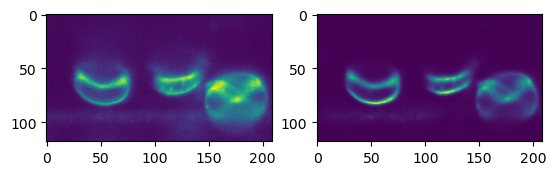

In [12]:
import matplotlib.pyplot as plt 

f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.squeeze(img.data)[40,...])
axarr[1].imshow(img_norm[40,...])


## Trying RL Decon option on a larger dataset. 

This can be downloaded from: https://cloudstor.aarnet.edu.au/plus/s/JerHyB7hAIOXiZw

In [5]:
#Can also optionally generate a numpy array of shape (834,300,2048) for testing purposes
img_large = AICSImage("C:\\Users\\deepu\\Documents\\RBC_full_time_series.czi")

img_large.dask_data

dask.array<transpose, shape=(3, 1, 834, 300, 2048), dtype=uint16, chunksize=(1, 1, 834, 300, 2048), chunktype=numpy.ndarray>

In [6]:
img_large_data = img_large.data[0,0,...]
print(img_large_data.shape)

(834, 300, 2048)


Taking more than 2 hours, so had to stop the code below

In [8]:
%%timeit -r 1 -n 1

img_decon_large= rl.doRLDeconvolutionFromNpArrays(data_np = img_large_data, 
                                 psf_np = psf_1, 
                                 niter= 20, 
                                 method = "gpu")

23-Sep-22 13:46:17 - root     - ERROR    - Shape (834, 300, 2048) is too large for OpenCL device shape limits [1024, 1024, 64]
23-Sep-22 13:46:19 - root     - ERROR    - blockshape is too large. Exiting.


KeyboardInterrupt: 

In [1]:
import reikna.cluda as cluda
api = cluda.ocl_api()
#code from test_reiknaFFT\reikna_getInfo.ipynb
devices = api.get_platforms()[0].get_devices()
print(f"OpenCL devices: {devices}")
for i in range(len(devices)):
    ocldevice = devices[i]
    print(f"Device {i}: {ocldevice}")
    print(f"max_work_group_size: {api.DeviceParameters(ocldevice).max_work_group_size}") # max_work_group_size: 1024
    print(f"max_work_item_sizes: {api.DeviceParameters(ocldevice).max_work_item_sizes}") # max_work_item_sizes: [1024, 1024, 64]
    print(f"max_num_groups: {api.DeviceParameters(ocldevice).max_num_groups}") # max_num_groups: [18446744073709551616, 18446744073709551616, 18446744073709551616]
    print(f"local_mem_size: {api.DeviceParameters(ocldevice).local_mem_size}") # local_mem_size: 49152
    print(f"local_mem_banks: {api.DeviceParameters(ocldevice).local_mem_banks}") # local_mem_banks: 32

OpenCL devices: [<pyopencl.Device 'NVIDIA GeForce MX150' on 'NVIDIA CUDA' at 0x20141e77580>]
Device 0: <pyopencl.Device 'NVIDIA GeForce MX150' on 'NVIDIA CUDA' at 0x20141e77580>
max_work_group_size: 1024
max_work_item_sizes: [1024, 1024, 64]
max_num_groups: [18446744073709551616, 18446744073709551616, 18446744073709551616]
local_mem_size: 49152
local_mem_banks: 32
